<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#0FD34D;overflow:hidden;font-weight:800">Top Spotify Songs</div>

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Dataset contains a comprehensive list of the most famous songs and most streamed songs as listed on Spotify.**

**It provides insights into each song's**

**Attributes**

Popularity

Presence on various music platforms

The dataset includes information such as track name

Artist's name

Release date

Spotify playlists and charts

Streaming statistics

Apple Music presence

Deezer presence

Shazam charts

Various audio features



## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [5]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding = 'latin-1')


In [6]:
# Check first 5 lines

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [7]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (953, 24)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
track_name,object,0,0.000000,0,943,953,NaN,NaN,NaN,NaN,Seven (feat. Latto) (Explicit Ver.),LALA,vampire
artist(s)_name,object,0,0.000000,0,645,953,NaN,NaN,NaN,NaN,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo
artist_count,int64,0,0.000000,0,8,953,1.0,8.0,1.556139,0.893044,2,1,1
released_year,int64,0,0.000000,0,50,953,1930.0,2023.0,2018.238195,11.116218,2023,2023,2023
released_month,int64,0,0.000000,0,12,953,1.0,12.0,6.033578,3.566435,7,3,6
released_day,int64,0,0.000000,0,31,953,1.0,31.0,13.930745,9.201949,14,23,30
in_spotify_playlists,int64,0,0.000000,0,879,953,31.0,52898.0,5200.124869,7897.60899,553,1474,1397
in_spotify_charts,int64,0,0.000000,0,82,953,0.0,147.0,12.009444,19.575992,147,48,113
streams,object,0,0.000000,0,949,953,NaN,NaN,NaN,NaN,141381703,133716286,140003974
in_apple_playlists,int64,0,0.000000,0,234,953,0.0,672.0,67.812172,86.441493,43,48,94


<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#0FD34D;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> I verified that the 'streams', 'in shazam charts' and 'in deezer playlists' columns need cleaning to create and better visualize the graphs. Let's go.</div>

In [8]:
# Cleaning
index_names = df[ df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3' ].index
df.drop(index_names, inplace = True)
df.in_deezer_playlists = df.in_deezer_playlists.str.replace(',', '') 
df.in_shazam_charts = df.in_shazam_charts.str.replace(',', '')
df ['in_shazam_charts'] = df ['in_shazam_charts']. fillna (0)

# Change type to 'int'.
df["streams"] = df["streams"].astype(str).astype(int)
df["in_shazam_charts"] = df["in_shazam_charts"].astype(str).astype(int)
df["in_deezer_playlists"] = df["in_deezer_playlists"].astype(str).astype(int)


OverflowError: Python int too large to convert to C long

In [9]:
# Reduce the name of two songs in the 'track_name' column for better visualization of the graphs. 
df.track_name = df.track_name.str.replace('Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)', 'Popular (with Playboi Carti & Madonna)') 
df.track_name = df.track_name.str.replace('Link Up (Metro Boomin & Don Toliver, Wizkid feat. BEAM & Toian) - Spider-Verse Remix (Spider-Man: Across the Spider-Verse )', 'Spider-Verse Remix') 

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#0FD34D;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> Ok, partial cleaning of the dataset is carried out only for executing and visualizing the data.</div>

## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

In [10]:
## We select the categorical and numeric variables to plot.

# Categorical variables:
cat_cols = df.select_dtypes(include = ['object', 'category']).columns.to_list()

# Numerical variables:
num_cols = df.select_dtypes(include = ['float', 'int']).columns.to_list()

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#0FD34D'> Numerical Variables</span></b>

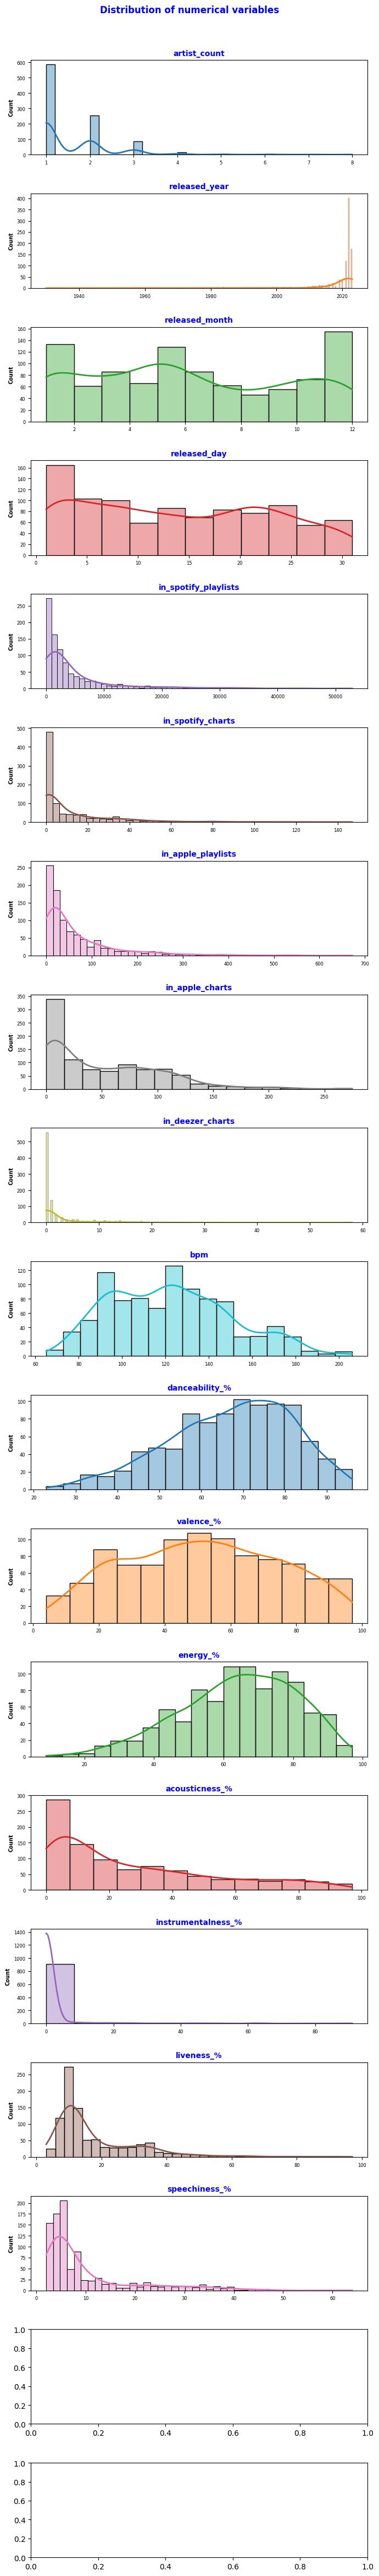

In [11]:
# Numerical variables:

fig,axes = plt.subplots(20, 1, figsize = (7, 50))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 10, fontweight = 'bold', color = 'blue')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[19])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'blue')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#0FD34D'> Categorical Variables</span></b>

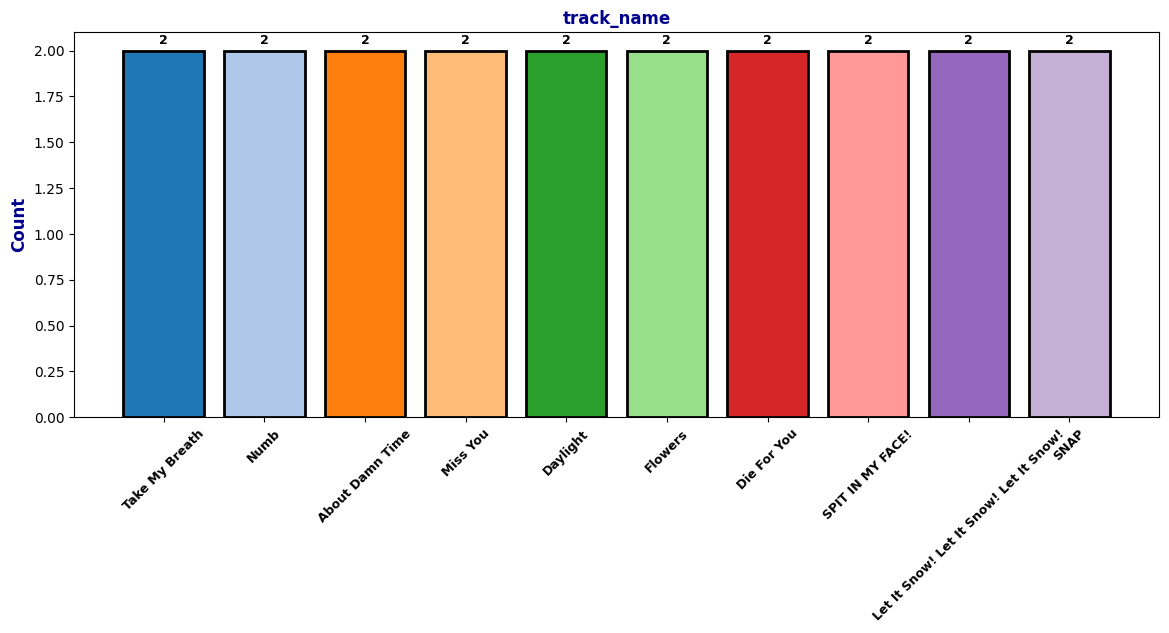

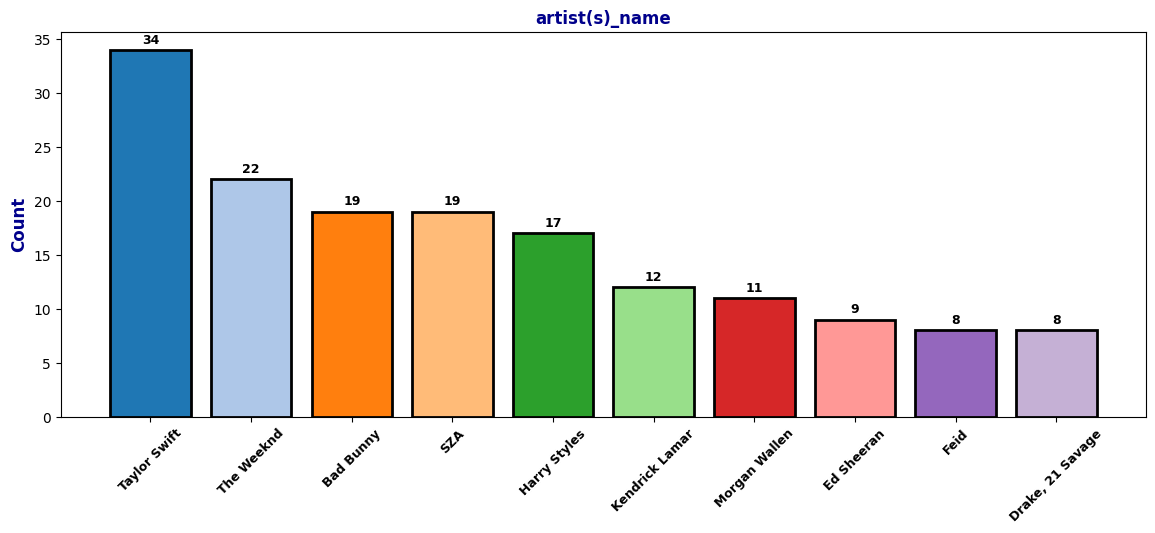

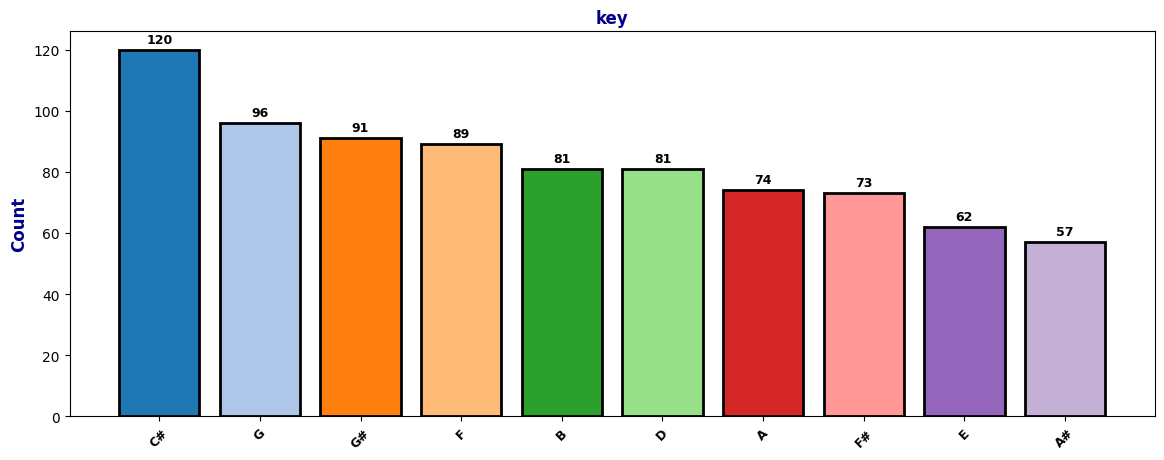

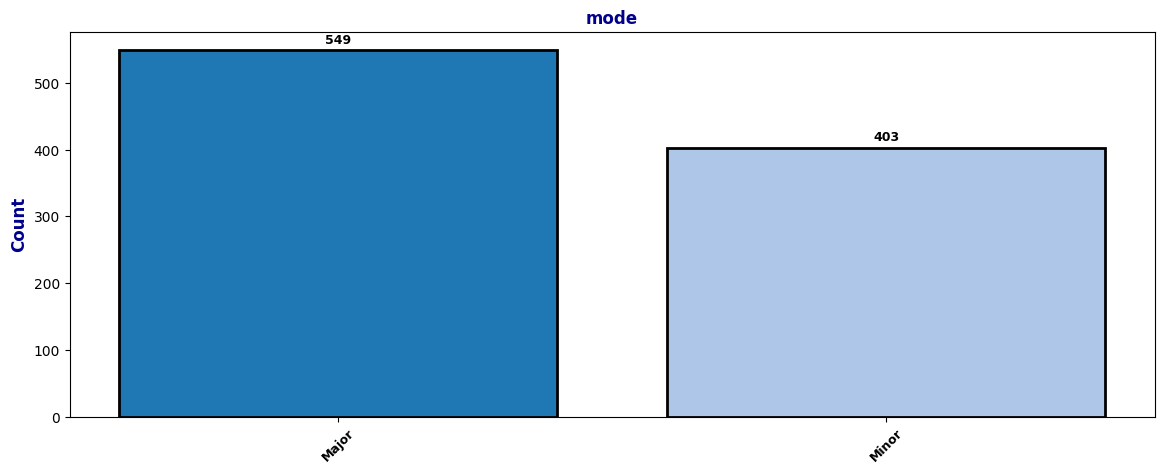

In [ ]:
# Top 10 for Categorical variables

cols = [0, 1, 2, 3]

for i in cols:

        if i == 0:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()
            
        else:
            
            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()
            

            

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#0FD34D'> Top Songs</span></b>

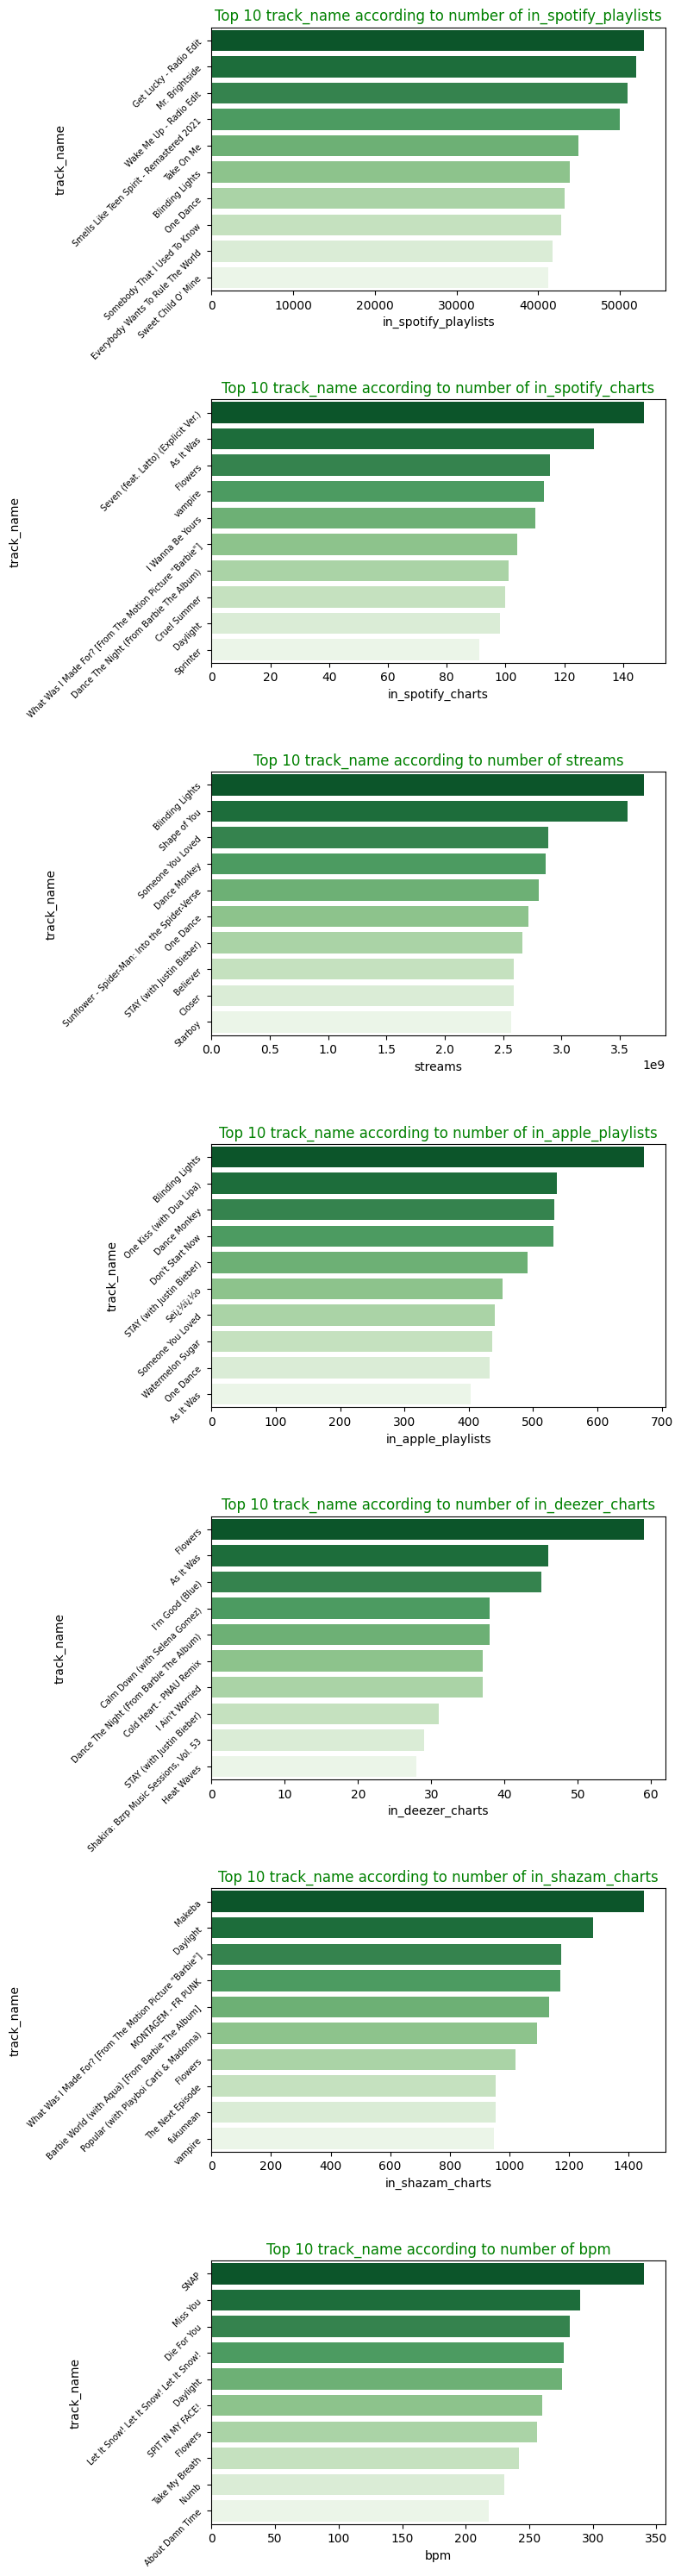

In [ ]:
# Top Songs
cols = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm']
fig, axes = plt.subplots(7, 1, figsize=(8, 30))

for ind, col in enumerate(cols):
    plt.subplot(7, 1, ind+1)
    df_top = df.groupby(['track_name'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False).head(10)

    sns.barplot(y=df_top["track_name"], x=df_top[col], palette="Greens_r")
    plt.yticks(rotation=45, fontsize = 7)
    plt.title(f"Top 10 track_name according to number of {col}", fontsize = 12, color = 'green')

plt.tight_layout()

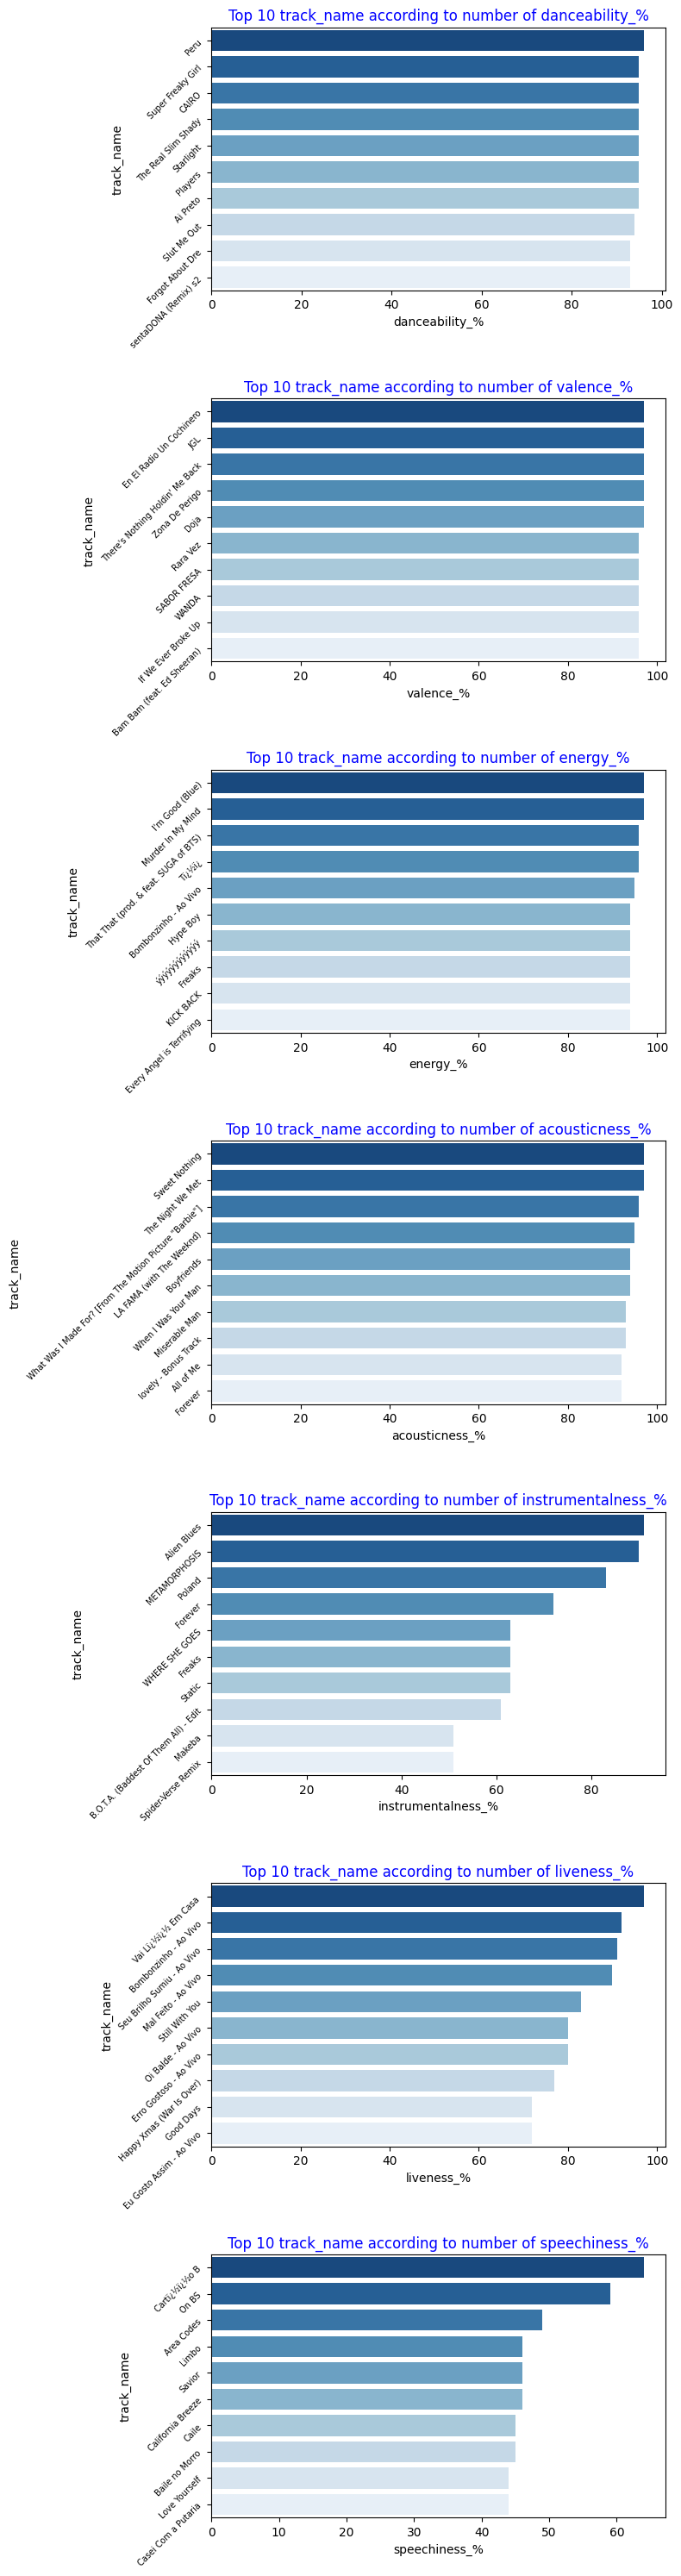

In [ ]:
# Top Songs - cols with %
cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
        'instrumentalness_%', 'liveness_%', 'speechiness_%']
fig, axes = plt.subplots(7, 1, figsize=(8, 30))

for ind, col in enumerate(cols):
    plt.subplot(7, 1, ind+1)
    df_top = df.groupby(['track_name'])[[col]].mean().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False).head(10)

    sns.barplot(y=df_top["track_name"], x=df_top[col], palette="Blues_r")
    plt.yticks(rotation=45, fontsize = 7)
    plt.title(f"Top 10 track_name according to number of {col}", fontsize = 12, color = 'blue')

plt.tight_layout()

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#0FD34D'> Top 5  Songs by Streams</span></b>

In [ ]:
# Let's create a dataframe to identify the songs with the biggest streams.

df_streams = df.sort_values(["streams", "track_name"], axis=0, ascending=False)
df_streams.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5


In [ ]:
# Let's create another dataframe with only the 5 songs with the biggest streams.
# To do this, we will locate them using the line number.
df_top_5_streams = df.iloc[[55, 179, 86, 620, 41]]

#Now let's select only the columns with Percentage (%), and then transpose
df_top_5_streams = df_top_5_streams[['track_name','danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
        'instrumentalness_%', 'liveness_%', 'speechiness_%']].set_index('track_name').T

df_top_5_streams

track_name,Blinding Lights,Shape of You,Someone You Loved,Lucid Dreams,Sunflower - Spider-Man: Into the Spider-Verse
danceability_%,50,83,50,44,76
valence_%,38,93,45,22,91
energy_%,80,65,41,48,50
acousticness_%,0,58,75,38,54
instrumentalness_%,0,0,0,0,0
liveness_%,9,9,11,33,7
speechiness_%,7,8,3,24,5


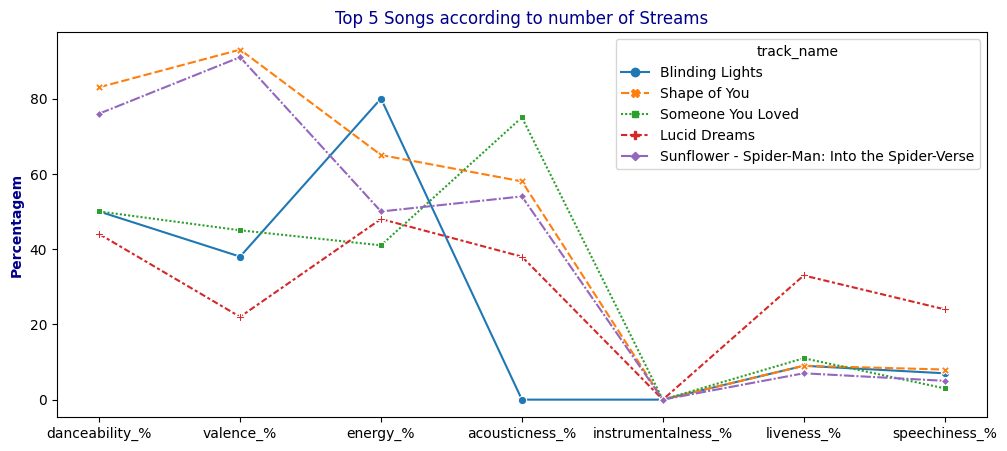

In [ ]:
# Visualizing the "abilities" of each song. 

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data=df_top_5_streams, markers=True)
plt.title(f"Top 5 Songs according to number of Streams", fontsize = 12, color = 'darkblue')
ax.set_ylabel('Percentagem', fontsize = 10, fontweight = 'bold', color = 'darkblue')


plt.show()

<div class="alert alert-block alert-info" style="background-color:#CDFCDC;color:#0FD34D;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b>  As we can see, there is no direct correlation between the number of "streams" and "abilities"</div>

## <b><div style='padding:15px;background-color:#0FD34D;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>